In [1]:
# import the necessary packages
from shapedetector import ShapeDetector
import argparse
import imutils
import cv2
import numpy as np

## First Try

In [2]:
# construct the argument parse and parse the arguments
ap = argparse.ArgumentParser()
ap.add_argument("-i", "--image", required=True,
	help="path to the input image")
args = vars(ap.parse_args(['--image','image_test_1.jpg']))

In [3]:
# load the image and resize it to a smaller factor so that
# the shapes can be approximated better
image = cv2.imread("image_test_1.jpg")
resized = imutils.resize(image, width=300)
ratio = image.shape[0] / float(resized.shape[0])
# convert the resized image to grayscale, blur it slightly,
# and threshold it
gray = cv2.cvtColor(resized, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(gray, (5, 5), 0)
thresh = cv2.threshold(blurred, 60, 255, cv2.THRESH_BINARY)[1]
# find contours in the thresholded image and initialize the
# shape detector
cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL,
	cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
sd = ShapeDetector()

In [4]:
len(cnts)

1

In [5]:
# loop over the contours
for c in cnts:
    try:
        # compute the center of the contour, then detect the name of the
        # shape using only the contour
        M = cv2.moments(c)
        cX = int((M["m10"] / M["m00"]) * ratio)
        cY = int((M["m01"] / M["m00"]) * ratio)
        shape = sd.detect(c)
        # multiply the contour (x, y)-coordinates by the resize ratio,
        # then draw the contours and the name of the shape on the image
        c = c.astype("float")
        c *= ratio
        c = c.astype("int")
        cv2.drawContours(image, [c], -1, (0, 255, 0), 2)
        cv2.putText(image, shape, (cX, cY), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2)
        # show the output image
        cv2.imshow("Image", image)
        cv2.waitKey(1)
    except:
        pass

## Second Try

In [23]:
img = cv2.imread('image_test_3.jpg')
imgGry = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

ret , thrash = cv2.threshold(imgGry, 240 , 255, cv2.CHAIN_APPROX_NONE)
_ , contours , hierarchy = cv2.findContours(thrash, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)



for contour in contours:
    approx = cv2.approxPolyDP(contour, 0.001* cv2.arcLength(contour, True), True)
    cv2.drawContours(img, [approx], 0, (0, 0, 0), 5)
    x = approx.ravel()[0]
    y = approx.ravel()[1] - 5
    if len(approx) == 3:
        cv2.putText( img, "Triangle", (x, y), cv2.FONT_HERSHEY_COMPLEX, 0.5, (0, 0, 0) )
    elif len(approx) == 4 :
        x, y , w, h = cv2.boundingRect(approx)
        aspectRatio = float(w)/h
        print(aspectRatio)
        if aspectRatio >= 0.95 and aspectRatio < 1.05:
            cv2.putText(img, "square", (x, y), cv2.FONT_HERSHEY_COMPLEX, 0.5, (0, 0, 0))

        else:
            cv2.putText(img, "rectangle", (x, y), cv2.FONT_HERSHEY_COMPLEX, 0.5, (0, 0, 0))

    elif len(approx) == 5 :
        cv2.putText(img, "pentagon", (x, y), cv2.FONT_HERSHEY_COMPLEX, 0.5, (0, 0, 0))
    elif len(approx) == 10 :
        cv2.putText(img, "star", (x, y), cv2.FONT_HERSHEY_COMPLEX, 0.5, (0, 0, 0))
    else:
        cv2.putText(img, "circle", (x, y), cv2.FONT_HERSHEY_COMPLEX, 0.5, (0, 0, 0))

cv2.imshow('shapes', img)
cv2.waitKey(1)
cv2.destroyAllWindows()

1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.5
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.5
1.5
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0


In [33]:
img = cv2.imread('image_test_3.jpg')

#Added
thresh = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
thresh = cv2.adaptiveThreshold(thresh, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 101, 0)

# imgGry = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# ret , thrash = cv2.threshold(imgGry, 240 , 255, cv2.CHAIN_APPROX_NONE)
_ , contours , hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)



for contour in contours:
    approx = cv2.approxPolyDP(contour, 0.001* cv2.arcLength(contour, True), True)
    cv2.drawContours(img, [approx], 0, (0, 0, 0), 5)
    x = approx.ravel()[0]
    y = approx.ravel()[1] - 5
    if len(approx) == 3:
        pass
        # cv2.putText( img, "Triangle", (x, y), cv2.FONT_HERSHEY_COMPLEX, 0.5, (0, 0, 0) )
    elif len(approx) == 4 :
        pass
        # x, y , w, h = cv2.boundingRect(approx)
        # aspectRatio = float(w)/h
        # # print(aspectRatio)
        # if aspectRatio >= 0.95 and aspectRatio < 1.05:
        #     cv2.putText(img, "square", (x, y), cv2.FONT_HERSHEY_COMPLEX, 0.5, (0, 0, 0))

        # else:
        #     cv2.putText(img, "rectangle", (x, y), cv2.FONT_HERSHEY_COMPLEX, 0.5, (0, 0, 0))

    elif len(approx) == 5 :
        pass
        # cv2.putText(img, "pentagon", (x, y), cv2.FONT_HERSHEY_COMPLEX, 0.5, (0, 0, 0))
    elif len(approx) == 10 :
        pass
        # cv2.putText(img, "star", (x, y), cv2.FONT_HERSHEY_COMPLEX, 0.5, (0, 0, 0))
    else:
        cv2.putText(img, "circle", (x, y), cv2.FONT_HERSHEY_COMPLEX, 0.5, (0, 0, 0))

cv2.imshow('shapes', img)
cv2.waitKey(1)
cv2.destroyAllWindows()

In [34]:
cv2.imshow('thresh', thresh)
cv2.waitKey(1)
cv2.destroyAllWindows()

In [7]:
img = cv2.imread('image_test_2.jpg')
imgGry = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

ret , thrash = cv2.threshold(imgGry, 240 , 255, cv2.CHAIN_APPROX_NONE)
_ , contours , hierarchy = cv2.findContours(thrash, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)



for i, contour in enumerate(contours):
    if i == 8:
        approx = cv2.approxPolyDP(contour, 0.001 * cv2.arcLength(contour, True), True)
        cv2.drawContours(img, [approx], 0, (0, 0, 0), 5)
        x = approx.ravel()[0]
        y = approx.ravel()[1] - 5
        if len(approx) == 3:
            cv2.putText( img, "Triangle", (x, y), cv2.FONT_HERSHEY_COMPLEX, 0.5, (0, 0, 0) )
        elif len(approx) == 4 :
            x, y , w, h = cv2.boundingRect(approx)
            aspectRatio = float(w)/h
            print(aspectRatio)
            if aspectRatio >= 0.95 and aspectRatio < 1.05:
                cv2.putText(img, "square", (x, y), cv2.FONT_HERSHEY_COMPLEX, 0.5, (0, 0, 0))

            else:
                cv2.putText(img, "rectangle", (x, y), cv2.FONT_HERSHEY_COMPLEX, 0.5, (0, 0, 0))

        elif len(approx) == 5 :
            cv2.putText(img, "pentagon", (x, y), cv2.FONT_HERSHEY_COMPLEX, 0.5, (0, 0, 0))
        elif len(approx) == 10 :
            cv2.putText(img, "star", (x, y), cv2.FONT_HERSHEY_COMPLEX, 0.5, (0, 0, 0))
        else:
            cv2.putText(img, "circle", (x, y), cv2.FONT_HERSHEY_COMPLEX, 0.5, (0, 0, 0))

cv2.imshow('shapes', img)
cv2.waitKey(1)
cv2.destroyAllWindows()

Number of circles detected: 22


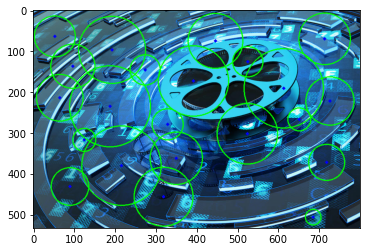

In [12]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# load the image
img = cv2.imread("image_test_3.jpg")

# convert BGR to RGB to be suitable for showing using matplotlib library
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# make a copy of the original image
cimg = img.copy()

# convert image to grayscale
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# apply a blur using the median filter
img = cv2.medianBlur(img, 5)

# finds the circles in the grayscale image using the Hough transform
circles = cv2.HoughCircles(image=img, method=cv2.HOUGH_GRADIENT, dp=0.9, minDist=80, param1=110, param2=39, maxRadius=100)

for co, i in enumerate(circles[0, :], start=1):
    # draw the outer circle
    cv2.circle(cimg,(i[0],i[1]),i[2],(0,255,0),2)
    # draw the center of the circle
    cv2.circle(cimg,(i[0],i[1]),2,(0,0,255),3)
    
# print the number of circles detected
print("Number of circles detected:", co)
# save the image, convert to BGR to save with proper colors
# cv2.imwrite("coins_circles_detected.png", cimg)
# show the image
plt.imshow(cimg)
plt.show()

In [7]:
import cv2
import numpy as np
  
# Load image
image = cv2.imread('image_test_1.jpg', 0)

# # convert BGR to RGB to be suitable for showing using matplotlib library
# image = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  
# Set our filtering parameters
# Initialize parameter settiing using cv2.SimpleBlobDetector
params = cv2.SimpleBlobDetector_Params()
  
# Set Area filtering parameters
params.filterByArea = True
# params.minArea = 100
params.minArea = 10
  
# Set Circularity filtering parameters
params.filterByCircularity = True 
# params.minCircularity = 0.9
params.minCircularity = 0.1
  
# Set Convexity filtering parameters
params.filterByConvexity = True
# params.minConvexity = 0.2
params.minConvexity = 0.9
      
# Set inertia filtering parameters
params.filterByInertia = True
# params.minInertiaRatio = 0.01
params.minInertiaRatio = 0.5
  
# Create a detector with the parameters
detector = cv2.SimpleBlobDetector_create(params)
      
# Detect blobs
keypoints = detector.detect(image)
  
# Draw blobs on our image as red circles
blank = np.zeros((1, 1)) 
blobs = cv2.drawKeypoints(image, keypoints, blank, (0, 0, 255), cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
  
number_of_blobs = len(keypoints)
text = "Number of Circular Blobs: " + str(len(keypoints))
cv2.putText(blobs, text, (20, 550), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 100, 255), 2)
  
# Show blobs
cv2.imshow("Filtering Circular Blobs Only", blobs)
cv2.waitKey(0)
cv2.destroyAllWindows()

Number of circles detected: 29


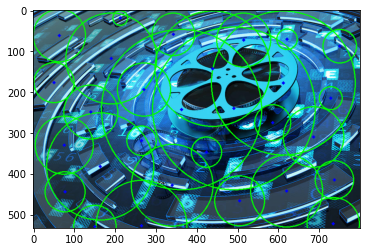

In [12]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# load the image
img = cv2.imread("image_test_3.jpg")

# convert BGR to RGB to be suitable for showing using matplotlib library
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# make a copy of the original image
cimg = img.copy()

# convert image to grayscale
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# apply a blur using the median filter
img = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,11,2)

# finds the circles in the grayscale image using the Hough transform
circles = cv2.HoughCircles(image=img, method=cv2.HOUGH_GRADIENT, dp=0.9, minDist=100, param1=110, param2=39, maxRadius=200)

for co, i in enumerate(circles[0, :], start=1):
    # draw the outer circle
    cv2.circle(cimg,(i[0],i[1]),i[2],(0,255,0),2)
    # draw the center of the circle
    cv2.circle(cimg,(i[0],i[1]),2,(0,0,255),3)
    
# print the number of circles detected
print("Number of circles detected:", co)
# save the image, convert to BGR to save with proper colors
# cv2.imwrite("coins_circles_detected.png", cimg)
# show the image
plt.imshow(cimg)
plt.show()

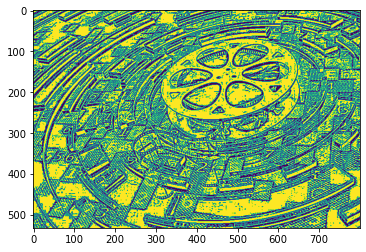

In [13]:
plt.imshow(img)
plt.show()

In [2]:
# THE CLOSEST WE COULD GET!!!!!!!

import cv2

img = cv2.imread('image_test_3.jpg')

thrash = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

thrash = cv2.adaptiveThreshold(thrash, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 101, 0)

# imgGry = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# imgGry = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

# Orginal Thresh
# ret , thrash = cv2.threshold(imgGry, 240 , 255, cv2.CHAIN_APPROX_NONE)

# Otsu's thresholding after Gaussian filtering
# blur = cv2.GaussianBlur(imgGry,(5,5),0)
# ret,thrash = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

# Otsu's thresholding
# ret,thrash = cv2.threshold(imgGry,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

# Adaptive Gaussian Thresholding
# thrash = cv2.adaptiveThreshold(imgGry,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
#             cv2.THRESH_BINARY,11,2)

# Regular Thresh
# blur = cv2.GaussianBlur(imgGry,(5,5),0)
# ret,thrash = cv2.threshold(blur,127,255,cv2.THRESH_TOZERO)

# Adaptive Thresholding
# thresh = cv2.adaptiveThreshold(thresh, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 101, 0)


_ , contours , hierarchy = cv2.findContours(thrash, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

# FINDING BIGGEST AREA
big_contour = []
max = 0

for contour in contours:

    approx = cv2.approxPolyDP(contour, 0.001* cv2.arcLength(contour, True), True)
    
    x = approx.ravel()[0]
    y = approx.ravel()[1] - 5
    if len(approx) == 3:
        pass
        # cv2.putText( img, "Triangle", (x, y), cv2.FONT_HERSHEY_COMPLEX, 0.5, (0, 0, 0) )
    elif len(approx) == 4 :
        pass
        # x, y , w, h = cv2.boundingRect(approx)
        # aspectRatio = float(w)/h
        # print(aspectRatio)
        # if aspectRatio >= 0.95 and aspectRatio < 1.05:
        #     cv2.putText(img, "square", (x, y), cv2.FONT_HERSHEY_COMPLEX, 0.5, (0, 0, 0))

        # else:
        #     cv2.putText(img, "rectangle", (x, y), cv2.FONT_HERSHEY_COMPLEX, 0.5, (0, 0, 0))

    elif len(approx) == 5 :
        pass
        # cv2.putText(img, "pentagon", (x, y), cv2.FONT_HERSHEY_COMPLEX, 0.5, (0, 0, 0))
    elif len(approx) == 10 :
        pass
        # cv2.putText(img, "star", (x, y), cv2.FONT_HERSHEY_COMPLEX, 0.5, (0, 0, 0))
    else:
        area = cv2.contourArea(contour) #--- find the contour having biggest area ---
        if(area > max):
            max = area
            big_contour = contour
            x_big = x
            y_big = y
            approx_big = approx

cv2.putText(img, "circle", (x_big, y_big), cv2.FONT_HERSHEY_COMPLEX, 0.5, (0, 0, 0))

cv2.drawContours(img, [approx_big], 0, (0, 0, 0), 5)

cv2.imshow('shapes', img)
cv2.waitKey(1)
cv2.destroyAllWindows()

In [3]:
cv2.imshow('thrash', thrash)
cv2.waitKey(1)
cv2.destroyAllWindows()

In [7]:
import cv2
import numpy as np

image = cv2.imread('image_test_3.jpg')

new_image = np.zeros(image.shape, image.dtype)

# Initialize values
alpha = 1.0 # Simple contrast control
beta = 0    # Simple brightness control


try:
    alpha = float(input('* Enter the alpha value [1.0-3.0]: '))
    beta = int(input('* Enter the beta value [0-100]: '))
except ValueError:
    print('Error, not a number')

# Do the operation new_image(i,j) = alpha*image(i,j) + beta

# Instead of these 'for' loops we could have used simply:
new_image = cv2.convertScaleAbs(image, alpha=alpha, beta=beta)

# but we wanted to show you how to access the pixels :)

# for y in range(image.shape[0]):
#     for x in range(image.shape[1]):
#         for c in range(image.shape[2]):
#             new_image[y,x,c] = np.clip(alpha*image[y,x,c] + beta, 0, 255)


cv.imshow('Original Image', image)
cv.imshow('New Image', new_image)
# Wait until user press some key
cv.waitKey()

13

In [1]:
import cv2

img = new_image

imgGry = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# imgGry = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

# Orginal Thresh
# ret , thrash = cv2.threshold(imgGry, 240 , 255, cv2.CHAIN_APPROX_NONE)

# Otsu's thresholding after Gaussian filtering
# blur = cv2.GaussianBlur(imgGry,(5,5),0)
# ret,thrash = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

# Otsu's thresholding
# ret,thrash = cv2.threshold(imgGry,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

# Adaptive Gaussian Thresholding
# thrash = cv2.adaptiveThreshold(imgGry,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
#             cv2.THRESH_BINARY,11,2)

# Regular Thresh
blur = cv2.GaussianBlur(imgGry,(5,5),0)
ret,thrash = cv2.threshold(blur,127,255,cv2.THRESH_TOZERO)

# Adaptive Mean Thresholding

# _ , contours , hierarchy = cv2.findContours(thrash, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)

_ , contours , hierarchy = cv2.findContours(thrash, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

# FINDING BIGGEST AREA
big_contour = []
max = 0

for contour in contours:

    approx = cv2.approxPolyDP(contour, 0.001* cv2.arcLength(contour, True), True)
    
    x = approx.ravel()[0]
    y = approx.ravel()[1] - 5
    if len(approx) == 3:
        pass
        # cv2.putText( img, "Triangle", (x, y), cv2.FONT_HERSHEY_COMPLEX, 0.5, (0, 0, 0) )
    elif len(approx) == 4 :
        pass
        # x, y , w, h = cv2.boundingRect(approx)
        # aspectRatio = float(w)/h
        # print(aspectRatio)
        # if aspectRatio >= 0.95 and aspectRatio < 1.05:
        #     cv2.putText(img, "square", (x, y), cv2.FONT_HERSHEY_COMPLEX, 0.5, (0, 0, 0))

        # else:
        #     cv2.putText(img, "rectangle", (x, y), cv2.FONT_HERSHEY_COMPLEX, 0.5, (0, 0, 0))

    elif len(approx) == 5 :
        pass
        # cv2.putText(img, "pentagon", (x, y), cv2.FONT_HERSHEY_COMPLEX, 0.5, (0, 0, 0))
    elif len(approx) == 10 :
        pass
        # cv2.putText(img, "star", (x, y), cv2.FONT_HERSHEY_COMPLEX, 0.5, (0, 0, 0))
    else:
        area = cv2.contourArea(contour) #--- find the contour having biggest area ---
        if(area > max):
            max = area
            big_contour = contour
            x_big = x
            y_big = y
            approx_big = approx

cv2.putText(img, "circle", (x_big, y_big), cv2.FONT_HERSHEY_COMPLEX, 0.5, (0, 0, 0))

cv2.drawContours(img, [approx_big], 0, (0, 0, 0), 5)

cv2.imshow('shapes', img)
cv2.waitKey(1)
cv2.destroyAllWindows()

NameError: name 'new_image' is not defined

In [3]:
import cv2
import numpy as np

img = cv2.imread('image_test_3.jpg')

img_dst = cv2.cvtColor(img, cv2.COLOR_BGR2YUV)

# equalize the histogram of the Y channel
img_yuv[:,:,0] = cv2.equalizeHist(img_yuv[:,:,0])

# convert the YUV image back to RGB format
img_output = cv2.cvtColor(img_yuv, cv2.COLOR_YUV2BGR)

cv2.imshow('Color input image', img)
cv2.imshow('Histogram equalized', img_output)

cv2.waitKey(0)

13

In [14]:
import cv2

t2 = cv2.imread('image_test_3.jpg')
thresh = cv2.cvtColor(t2, cv2.COLOR_BGR2GRAY)

thresh = cv2.adaptiveThreshold(thresh, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 101, 0)

count, labels, stats, centroids = cv2.connectedComponentsWithStats(thresh, connectivity = 8)
for i in range(1,count):
    t2 = cv2.circle(t2, (int(centroids[i,0]), int(centroids[i,1])), 5, (0, 255, 0, 0), 5)

cv2.imshow('circles', thresh)
cv2.imshow('centers', t2)
cv2.waitKey()

13

In [2]:
stats

array([[     0,      0,    800,    533, 167094],
       [     0,      0,     39,     20,    360],
       [     0,      0,    291,    223,  20556],
       ...,
       [   705,    530,      5,      3,     14],
       [    25,    532,      1,      1,      1],
       [   410,    532,      4,      1,      4]], dtype=int32)

In [3]:
stats[0]

array([     0,      0,    800,    533, 167094], dtype=int32)